# Linear Regression is classified into types:

    1.Simple Linear Regression (y=mx+c)
    Here there is only one Feature (X) or only one independent variable
    
    2.Multiple Linear Regression(y=m1x1+m2x2+m3x3+....+mnxn)
    Here it has many Features (X) or many independent variables.

Here we will see Simple Linear Regression having only one Feature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The given dataset consists of 25 Responses wherein the 2 features are present.

Basically the dataset is about the scores that you can score by studying for given hours.

For Feature hours the max value is 9.2 and min value 1.1. Mean is 5 Median is 4.8.

Positive skewness is present in dataset.

In [11]:
#we can do some Feature Engineering by adding grades on the basis of marks
def getgrade(marks):
    if (marks>=75):
        return "A"
    elif(marks>=60 and marks<75):
        return "B"
    elif(marks>=35 and marks<60):
        return "C"
    else:
        return "F"

In [17]:
df["Grade"]=df.Scores.apply(getgrade)

In [18]:
df.head()

,Hours,Scores,Grade
0,2.5,21,F
1,5.1,47,C
2,3.2,27,F
3,8.5,75,A
4,3.5,30,F


In [19]:
df.Grade.value_counts()

F    9
A    7
C    5
B    4
Name: Grade, dtype: int64

<AxesSubplot:>

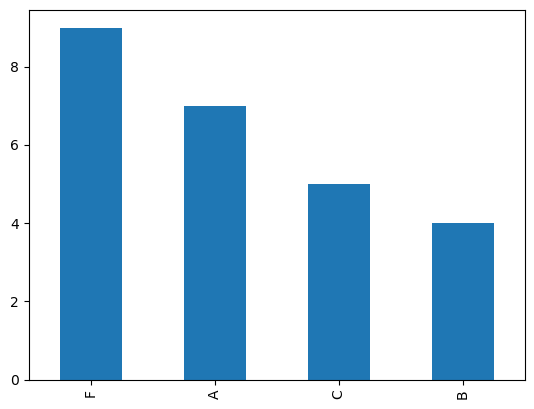

In [20]:
df.Grade.value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Grade'>

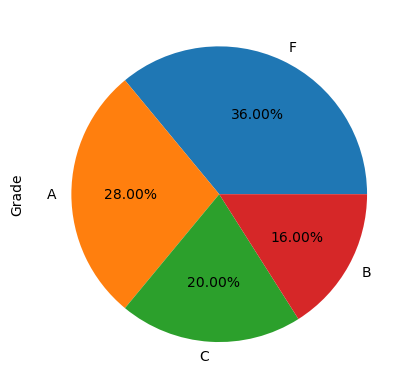

In [21]:
df.Grade.value_counts().plot(kind="pie",autopct="%.2f%%")

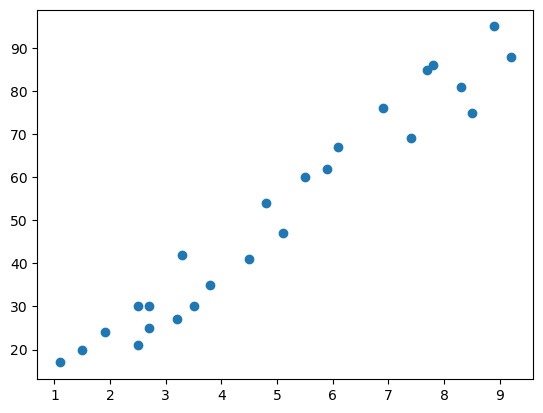

In [22]:
plt.scatter((df.Hours),(df.Scores))

In [23]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Hours and Scores are 97% co-related 

# Divide the dataset into Features and Target

Feature==>x

Target==>y

In [24]:
df.head()

,Hours,Scores,Grade
0,2.5,21,F
1,5.1,47,C
2,3.2,27,F
3,8.5,75,A
4,3.5,30,F


In [27]:
x=df.iloc[:,:-2]
x
#2D DataFrame

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [29]:
y=df.iloc[:,-2]
y
#1D Array

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [35]:
linreg.coef_

array([10.46110829])

This is the value of slope m

In [36]:
linreg.intercept_

-1.5369573315500702

This is the value of intercept C

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f"MAE:{mae}\n MSE:{mse}\n RMSE:{rmse}\n Accuracy:{r2}")

MAE:7.882398086270432
 MSE:68.88092074277635
 RMSE:8.299453038771674
 Accuracy:0.8421031525243527


Here Model Accuracy is 84%

# Model Performance on Training Set

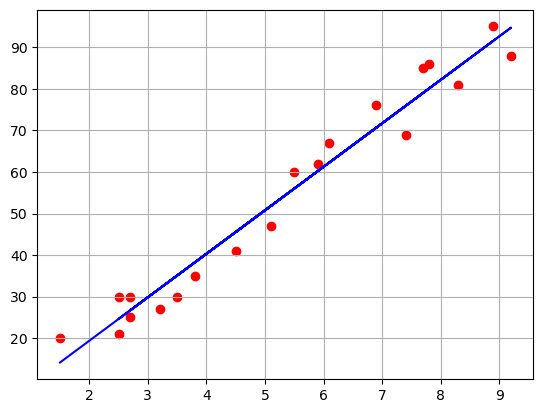

In [46]:
plt.scatter(xtrain,ytrain,color="red")
plt.plot(xtrain,linreg.predict(xtrain),color="blue")
plt.grid()
plt.show()

# Model Performance on Testing Set

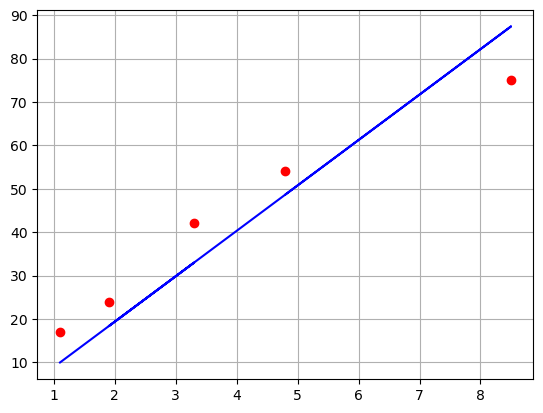

In [47]:
plt.scatter(xtest,ytest,color="red")
plt.plot(xtest,ypred,color="blue")
plt.grid()
plt.show()

# Predicting New Observation

In [59]:
def makeprediction():
    new_obs=float(input("Enter number of Hours you study:"))
    yp=linreg.predict([[new_obs]])[0]
    print(f"If you study for {new_obs} hrs, you will score {yp:.1f} marks")

In [60]:
makeprediction()

Enter number of Hours you study:5
If you study for 5.0 hrs, you will score 50.8 marks


In [61]:
makeprediction()

Enter number of Hours you study:8
If you study for 8.0 hrs, you will score 82.2 marks
